# Privacy-preserving Explanations

In [1]:
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "../..")))
os.getcwd()

'/nas-ctm01/homes/mjvieira/classify-protect-illegal-porn-xai'

In [2]:
DATA_LOC = "/nas-ctm01/datasets/public/BIOMETRICS/pornography-2k-db/data-processed/even-20"
FACES_LOC = "/nas-ctm01/datasets/public/BIOMETRICS/pornography-2k-db/data-processed/even-20-detected-faces"
EXPLANATIONS_LOC = "results/pornography-2k/cnns/data-aug/even-20/explanations/vgg19_freeze_False_epochs_50_batch_16_optim_sgd_aug_True_split_10_20/captum/correct/IG/npys"
# EXPLANATIONS_LOC = "results/pornography-2k/transformers/data-aug/even-20/explanations/vit_base_patch16_224_epochs_50_batch_16_optim_sgd_aug_True_split_10_20/correct/npys"
SAVE_LOC = "temp-results"

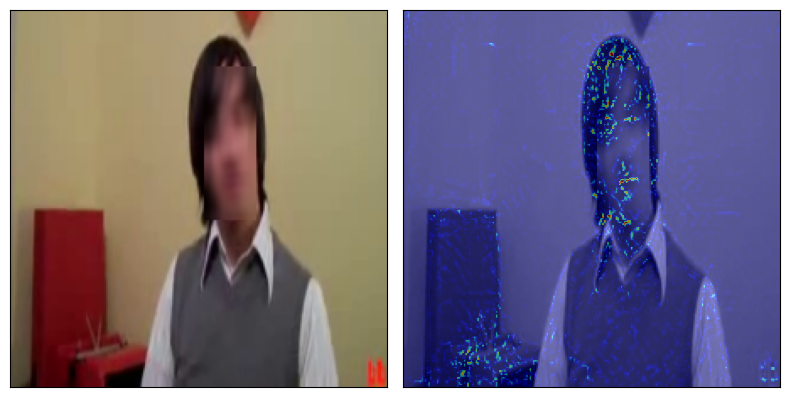

,frame,box,conf,area,perc,abs_attr,pos_attr,neg_attr
0,vNonPorn000050#2.jpg,"(115.0, 34.0, 146.0, 125.0)",0.86716,2821.0,5.62221,19.276098,18.883283,19.656276


In [26]:
%run src/privacy_preserving_explanations.py \
    --data_loc {DATA_LOC} \
    --faces_loc {FACES_LOC} \
    --explanations_loc {EXPLANATIONS_LOC} \
    --save_loc {SAVE_LOC} \
    --to_anonymize "vNonPorn000050#2.jpg" \
    --show --side_by_side

Device: cpu



image 1/1 /nas-ctm01/datasets/public/BIOMETRICS/pornography-2k-db/data-processed/even-20/vNonPorn000050#2.jpg: 544x960 1 face, 1903.8ms
Speed: 8.6ms preprocess, 1903.8ms inference, 7.1ms postprocess per image at shape (1, 3, 544, 960)
vNonPorn000050#2.jpg: 1 faces detected


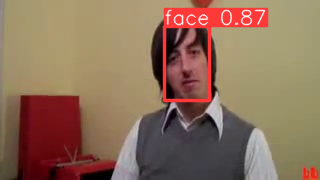

In [10]:
%run src/yolo_face_detection.py \
    --data_loc {DATA_LOC} \
    --to_detect "vNonPorn000050#2.jpg" \
    --show

Device: cpu

image 1/1 /nas-ctm01/datasets/public/BIOMETRICS/pornography-2k-db/data-processed/even-20/vNonPorn000050#2.jpg: 544x960 1 face, 1867.1ms
Speed: 7.4ms preprocess, 1867.1ms inference, 5.6ms postprocess per image at shape (1, 3, 544, 960)
vNonPorn000050#2.jpg: 1 faces detected


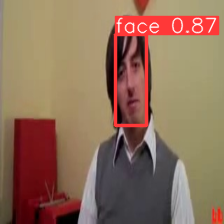

In [11]:
%run src/yolo_face_detection.py \
    --data_loc {DATA_LOC} \
    --input_shape {224} \
    --to_detect "vNonPorn000050#2.jpg" \
    --show

(-0.5, 243.5, 223.5, -0.5)

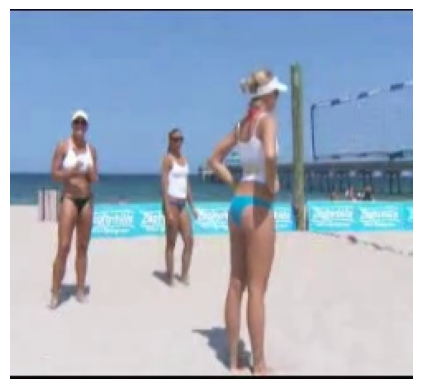

In [6]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(DATA_LOC, "vNonPorn000255#12.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = A.Resize(224, 244)(image=img)["image"]
plt.imshow(img)
plt.axis("off")

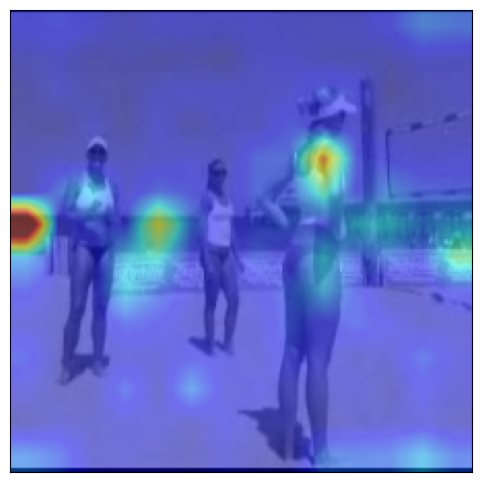

In [7]:
from src.utils.xai_visualization import visualize_explanation
import numpy as np

visualize_explanation(
    image=img,
    attr=np.load(os.path.join(EXPLANATIONS_LOC, "vPorn000533#9.npy")),
    colormap="jet",
).show()

## Analysis of results

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("../../results/pornography-2k/cnns/data-aug/even-20/explanations/vgg19_freeze_False_epochs_50_batch_16_optim_sgd_aug_True_split_10_20/correct/IG/faces/results.csv")
df

In [ ]:
df.info()

In [ ]:
df[(df["attr"] > 50) & df["frame"].str.contains("vPorn")].sort_values(by="attr", ascending=False)